In [2]:
import numpy as np
from matplotlib import pyplot as plt

Picture crop with a 1:1 aspect ratio

![Crop picture](diagram.png)

Let $D$ be an array containing the slicing indexes:

$$ D = A \times B + C =
\begin{pmatrix}
\frac{L - l}{2} & \frac{L + l}{2}\\
\end{pmatrix} 
\times
\begin{pmatrix}
(1-d) & 0 & d & 0 \\
0 & (1-d) & 0 & d \\
\end{pmatrix} +
\begin{pmatrix}
0 & d \cdot L & 0 & (1-d) \cdot L \\
\end{pmatrix}
$$

Where:


$L$ : long side of the rectangle

$l$ : short side of the rectangle

$d$ : dimension of the long side, either 0 or 1 ( $y$ or $x$ axis)


In [15]:
def CropPicture(picture):
    
    '''
    Given a picture as a numpy array, returns a 1:1 aspect ratio crop, from the picture centre
    
    '''

    d = np.argmax(picture.shape[:2]) # dimension of the largest side
    
    L = picture.shape[d]
    l = picture.shape[1-d]

    start = round( (L - l) / 2)
    end = start + l
    
    A = np.array([start, end])
    B = np.array( [[1-d, 0, d, 0],
                 [0, 1-d, 0, d]] )
    C = np.array([0, d*L, 0, (1-d)*L ])
    D = np.matmul(A, B) + C

    print('Long dimension: ', d)
    print('Slice index array: ', D)
     
    return picture[ D[0]:D[1], D[2]:D[3], :]

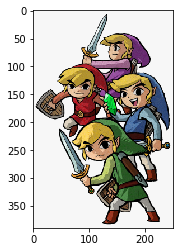

Long dimension:  0
Slice index array:  [ 70 320   0 390]


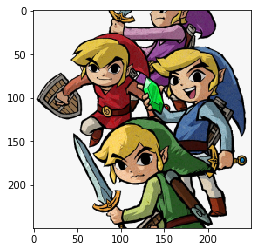

In [16]:
narrow_pic = plt.imread("narrow_pic.png")

plt.imshow(narrow_pic, cmap = 'gray')
plt.show()


plt.imshow(CropPicture(narrow_pic), cmap = 'gray')
plt.show()


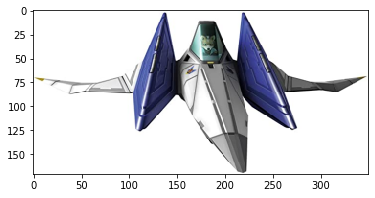

Long dimension:  1
Slice index array:  [  0 350  90 261]


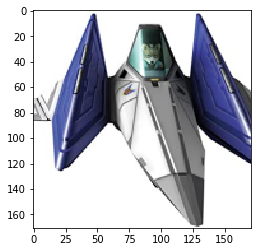

In [17]:
wide_pic = plt.imread("wide_pic.png")

plt.imshow(wide_pic, cmap = 'gray')
plt.show()


plt.imshow(CropPicture(wide_pic), cmap = 'gray')
plt.show()